In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [32]:
import sys
sys.path.append(r"C:\Users\pierre.carles\Documents\GitHub\case7-lockdown-exit-strategy")
from covid.economics.macro_model import MacroModel

In [33]:
pd.Timestamp(datetime.date.today())

Timestamp('2020-05-14 00:00:00')

In [36]:
import datetime
mm = MacroModel("tta", pd.Timestamp(datetime.date.today()), 45)

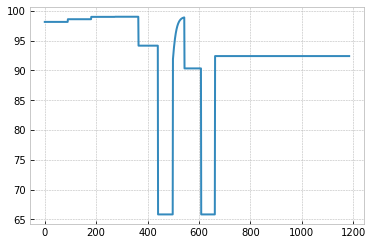

In [37]:
mm.production_nat()
mm.reconfinement_nat("2020-09-01", 54)
plt.plot(mm.df['y_projection'])

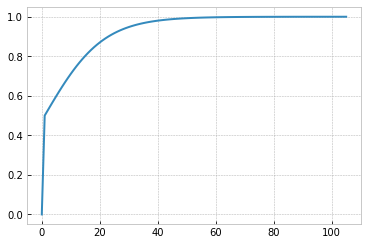

In [10]:
plt.plot(mm.x_actif[44:])

In [80]:
mm.effective_production(sector ='agriculture', strategy=['confinement'])

{'agriculture': 88.0}

In [81]:
mm.production_nat()

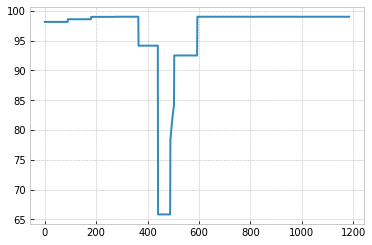

In [82]:
plt.plot(mm.df.y_projection)

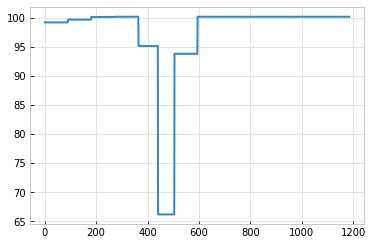

In [100]:
plt.plot(mm.df['y_92'])

C:\Users\pierre.carles\Documents\GitHub\case7-lockdown-exit-strategy\covid\economics\macro_model.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[sector][i] = self.effective_production(sector= sector, strategy = ['confinement'])[sector]
C:\Users\pierre.carles\Documents\GitHub\case7-lockdown-exit-strategy\covid\economics\macro_model.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[sector][i] = self.effective_production(sector= sector, strategy = strategy )[sector]*self.x_actif[j]+(1-self.x_actif[j])*self.effective_production(sector= sector,strategy = ['confinement'])[sector]
C:\Users\pierre.carles\

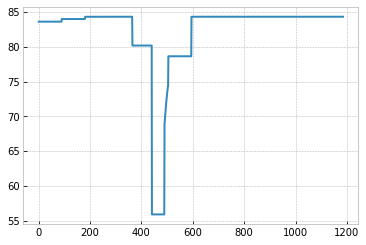

In [115]:
mm.production_nat(method = 'dept', dept_confine = [75,92,93])
plt.plot(mm.df.y_projection)

In [116]:
mm.df.columns

Index(['year', 'trimestre', 'month', 'ds', 'pib', 'agriculture', 'energie',
       'industrie-alimentaire', 'industrie-coke', 'industrie-biens',
       'industrie-transport', 'industrie-autres', 'construction', 'commerce',
       'transport', 'hebergement-restauration', 'information-communication',
       'finance', 'immobilier', 'services', 'service-public', 'autres',
       'y_projection', 'y_75', 'y_92', 'y_93'],
      dtype='object')

In [114]:
df

,year,trimestre,month,ds,pib,agriculture,energie,industrie-alimentaire,industrie-coke,industrie-biens,...,information-communication,finance,immobilier,services,service-public,autres,y_projection,y_75,y_92,y_93
0,2019,T1,1,2019-01-01,99.502191,100.401707,102.565738,99.801196,134.738233,102.777279,...,96.584283,97.15836,98.908247,98.514973,98.612998,99.702493,83.620438,98.882008,99.165588,99.101657
1,2019,T1,1,2019-01-02,99.502191,100.401707,102.565738,99.801196,134.738233,102.777279,...,96.584283,97.15836,98.908247,98.514973,98.612998,99.702493,83.620438,98.882008,99.165588,99.101657
2,2019,T1,1,2019-01-03,99.502191,100.401707,102.565738,99.801196,134.738233,102.777279,...,96.584283,97.15836,98.908247,98.514973,98.612998,99.702493,83.620438,98.882008,99.165588,99.101657
3,2019,T1,1,2019-01-04,99.502191,100.401707,102.565738,99.801196,134.738233,102.777279,...,96.584283,97.15836,98.908247,98.514973,98.612998,99.702493,83.620438,98.882008,99.165588,99.101657
4,2019,T1,1,2019-01-05,99.502191,100.401707,102.565738,99.801196,134.738233,102.777279,...,96.584283,97.15836,98.908247,98.514973,98.612998,99.702493,83.620438,98.882008,99.165588,99.101657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,2022,T1,3,2022-03-27,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,84.326815,100.051667,100.138333,100.116667
1182,2022,T1,3,2022-03-28,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,84.326815,100.051667,100.138333,100.116667
1183,2022,T1,3,2022-03-29,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,84.326815,100.051667,100.138333,100.116667
1184,2022,T1,3,2022-03-30,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,84.326815,100.051667,100.138333,100.116667


In [101]:
df_monthly = mm.df.set_index('ds').resample("M").mean() 

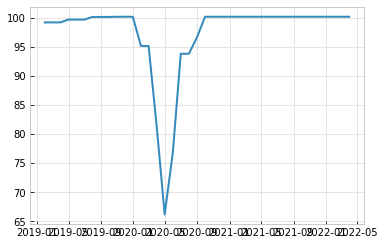

In [106]:
pib_dept= 'y_'+ str(92)
plt.plot(df_monthly[pib_dept])

In [ ]:
mm.df

In [11]:
mm.production_dept(75)

C:\Users\pierre.carles\Documents\GitHub\case7-lockdown-exit-strategy\covid\economics\macro_model.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[sector][i] = self.effective_production(sector= sector, strategy = strategy )[sector]*self.x_actif[j]+(1-self.x_actif[j])*self.effective_production(sector= sector,strategy = ['confinement'])[sector]
C:\Users\pierre.carles\Documents\GitHub\case7-lockdown-exit-strategy\covid\economics\macro_model.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[sector][i] = self.effective_production(sector= sector, strategy = strategy)[sector]
C:\Users\pierre.carles\Documen

In [12]:
mm.df.columns

Index(['year', 'trimestre', 'month', 'ds', 'pib', 'agriculture', 'energie',
       'industrie-alimentaire', 'industrie-coke', 'industrie-biens',
       'industrie-transport', 'industrie-autres', 'construction', 'commerce',
       'transport', 'hebergement-restauration', 'information-communication',
       'finance', 'immobilier', 'services', 'administration', 'autres',
       'y_75'],
      dtype='object')

In [22]:
t = '75,77,78,91,92,93,94,95'
t.split(",")

['75', '77', '78', '91', '92', '93', '94', '95']

In [110]:
mm.df[mm.df['ds'] <'2020-07-01']

,year,trimestre,month,ds,pib,agriculture,energie,industrie-alimentaire,industrie-coke,industrie-biens,...,services,service-public,autres,y_projection,y_75,y_77,y_78,y_92,y_93,y_94
0,2019,T1,1,2019-01-01,99.502191,100.401707,102.565738,99.801196,134.738233,102.777279,...,98.514973,98.612998,99.702493,83.620438,98.882008,99.365896,99.439960,99.165588,99.101657,99.026000
1,2019,T1,1,2019-01-02,99.502191,100.401707,102.565738,99.801196,134.738233,102.777279,...,98.514973,98.612998,99.702493,83.620438,98.882008,99.365896,99.439960,99.165588,99.101657,99.026000
2,2019,T1,1,2019-01-03,99.502191,100.401707,102.565738,99.801196,134.738233,102.777279,...,98.514973,98.612998,99.702493,83.620438,98.882008,99.365896,99.439960,99.165588,99.101657,99.026000
3,2019,T1,1,2019-01-04,99.502191,100.401707,102.565738,99.801196,134.738233,102.777279,...,98.514973,98.612998,99.702493,83.620438,98.882008,99.365896,99.439960,99.165588,99.101657,99.026000
4,2019,T1,1,2019-01-05,99.502191,100.401707,102.565738,99.801196,134.738233,102.777279,...,98.514973,98.612998,99.702493,83.620438,98.882008,99.365896,99.439960,99.165588,99.101657,99.026000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,2020,T2,6,2020-06-26,0.000000,100.000000,80.000000,100.000000,40.000000,100.000000,...,90.000000,100.000000,80.000000,78.639966,95.019000,94.120474,93.540316,93.780684,94.461053,94.821368
543,2020,T2,6,2020-06-27,0.000000,100.000000,80.000000,100.000000,40.000000,100.000000,...,90.000000,100.000000,80.000000,78.639966,95.019000,94.120474,93.540316,93.780684,94.461053,94.821368
544,2020,T2,6,2020-06-28,0.000000,100.000000,80.000000,100.000000,40.000000,100.000000,...,90.000000,100.000000,80.000000,78.639966,95.019000,94.120474,93.540316,93.780684,94.461053,94.821368
545,2020,T2,6,2020-06-29,0.000000,100.000000,80.000000,100.000000,40.000000,100.000000,...,90.000000,100.000000,80.000000,78.639966,95.019000,94.120474,93.540316,93.780684,94.461053,94.821368
